   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
Matriz de Confusión:
[[79  0]
 [64  0]]

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.55      1.00      0.71        79
           1       1.00      0.00      0.00

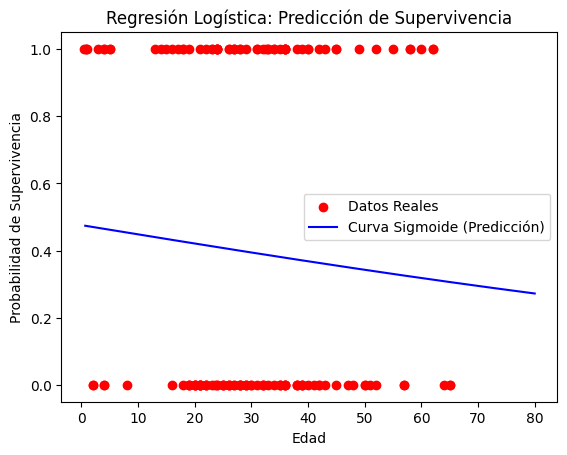

In [1]:
# Importar bibliotecas
import numpy as np  # Para operaciones matemáticas
import pandas as pd  # Para manipulación de datos
from sklearn.model_selection import train_test_split  # Para dividir los datos en entrenamiento/prueba
from sklearn.preprocessing import StandardScaler  # Para escalado de características
from sklearn.linear_model import LogisticRegression  # Para el modelo de regresión logística
from sklearn.metrics import classification_report, confusion_matrix  # Para evaluar el modelo
import matplotlib.pyplot as plt  # Para visualización de datos

# Cargar el conjunto de datos desde GitHub
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"  # Ejemplo: dataset de Titanic
dataset = pd.read_csv(url)

# Ver las primeras filas para entender el conjunto de datos
print(dataset.head())

# Preprocesamiento del conjunto de datos
# Usaremos 'age' y 'fare' como variables independientes (X) y 'survived' como variable dependiente (y)
dataset = dataset.dropna(subset=['age', 'fare', 'survived'])  # Eliminar filas con valores nulos
X = dataset[['age']].values  # Solo usamos 'age' para facilitar la visualización
y = dataset['survived'].values  # Variable dependiente (sobrevivió: 0 o 1)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Escalado de características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Ajustar la Regresión Logística al conjunto de entrenamiento
logistic_regressor = LogisticRegression()
logistic_regressor.fit(X_train, y_train)

# Predecir los resultados para el conjunto de prueba
y_pred = logistic_regressor.predict(X_test)

# Evaluar el modelo
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

# Ajustar zero_division en el informe
print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred, zero_division=1))

# Revisar la distribución de predicciones
print("Distribución de predicciones:", np.unique(y_pred, return_counts=True))


# Visualizar los resultados: predicción lógica (curva sigmoide)
# Generar valores uniformemente espaciados para 'age' escalados
X_curve = np.linspace(X_train.min(), X_train.max(), 300).reshape(-1, 1)
y_curve = logistic_regressor.predict_proba(X_curve)[:, 1]  # Probabilidad de sobrevivir (clase 1)

# Graficar datos y curva sigmoide
plt.scatter(scaler.inverse_transform(X_test), y_test, color="red", label="Datos Reales")
plt.plot(scaler.inverse_transform(X_curve), y_curve, color="blue", label="Curva Sigmoide (Predicción)")
plt.title("Regresión Logística: Predicción de Supervivencia")
plt.xlabel("Edad")
plt.ylabel("Probabilidad de Supervivencia")
plt.legend()
plt.show()
